# Data Load and Wrangle

## The goal of the exercise is to load a dataset, clean and transform and compute descriptive statistics

In [1]:
# This piece of code enables to display multiple output within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

<div class="alert alert-block alert-warning">
    
## Task Instructions 
### Load one of the built in dataset
### Transform the data as required 
### From a perspective of a journalist interested in writing a story about the data, **_ask and answer_** **3** questions that summarize the sample. 
    
#### Please *_only use summary statistics_* (mean, median, mode, standard deviation, variance, range,..). The statistics can be computed by groups.

#### Reference :https://kolesnikov.ga/Datasets_in_Python/

</div>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
elnino = sm.datasets.elnino

print(elnino.DESCRLONG)
print(elnino.NOTE)

This data contains the averaged monthly sea surface
temperature in degrees Celcius of the Pacific Ocean, between 0-10 degrees South
and 90-80 degrees West, from 1950 to 2010.  This dataset was obtained from
NOAA.

::

    Number of Observations - 61 x 12

    Number of Variables - 1

    Variable name definitions::

        TEMPERATURE - average sea surface temperature in degrees Celcius
                      (12 columns, one per month).



In [4]:
dataset_elnino = elnino.load_pandas()

In [5]:
df_elnino = dataset_elnino.data
df_elnino.head(20)
df_elnino.tail(20)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1950.0,23.11,24.20,25.37,23.86,23.03,21.57,20.63,20.15,19.67,20.03,20.02,21.80
1,1951.0,24.19,25.28,25.60,25.37,24.79,24.69,23.86,22.32,21.44,21.77,22.33,22.89
2,1952.0,24.52,26.21,26.37,24.73,23.71,22.34,20.89,20.02,19.63,20.40,20.77,22.39
3,1953.0,24.15,26.34,27.36,27.03,25.47,23.49,22.20,21.45,21.25,20.95,21.60,22.44
4,1954.0,23.02,25.00,25.33,22.97,21.73,20.77,19.52,19.33,18.95,19.11,20.27,21.30
5,1955.0,23.75,24.82,25.14,24.22,22.16,21.20,20.46,19.63,19.24,19.16,19.84,21.19
6,1956.0,23.24,24.71,25.90,24.66,23.14,22.04,21.47,20.55,19.89,19.69,20.57,21.58
7,1957.0,23.13,26.30,27.63,27.15,26.72,25.04,23.83,22.34,21.80,21.80,22.39,23.69
8,1958.0,24.89,26.55,27.09,26.37,24.71,23.23,22.31,20.72,20.62,21.05,21.52,22.50
9,1959.0,23.97,25.90,26.94,25.84,24.23,22.57,21.50,20.15,20.23,20.86,21.88,22.55


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
41,1991.0,23.99,25.59,26.31,25.15,24.44,23.28,22.39,21.39,21.22,21.73,22.40,23.75
42,1992.0,25.02,26.62,27.72,27.58,26.44,23.86,21.84,20.87,20.85,21.15,21.84,22.79
43,1993.0,24.68,26.46,27.07,26.84,25.60,24.11,22.61,21.65,21.11,21.71,22.07,22.86
44,1994.0,24.56,25.89,25.75,24.49,23.52,22.31,21.17,20.22,20.65,22.04,22.27,23.75
45,1995.0,25.48,26.25,26.09,24.32,23.37,22.43,21.42,20.46,20.50,20.62,21.49,22.03
46,1996.0,23.81,25.52,26.28,24.00,23.11,21.66,20.72,20.23,20.43,20.52,20.77,21.68
47,1997.0,23.70,26.08,27.17,26.74,26.77,26.15,25.59,24.95,24.69,24.64,25.85,27.08
48,1998.0,28.12,28.82,29.24,28.45,27.36,25.19,23.61,22.27,21.31,21.37,21.60,22.81
49,1999.0,24.23,25.73,26.47,24.53,23.64,22.09,21.36,20.67,20.08,20.46,20.62,22.42
50,2000.0,24.01,25.38,25.67,25.53,24.27,22.93,21.47,20.07,20.64,20.90,20.67,22.08


In [6]:
sm.datasets.elnino.load_pandas().data

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1950.0,23.11,24.20,25.37,23.86,23.03,21.57,20.63,20.15,19.67,20.03,20.02,21.80
1,1951.0,24.19,25.28,25.60,25.37,24.79,24.69,23.86,22.32,21.44,21.77,22.33,22.89
2,1952.0,24.52,26.21,26.37,24.73,23.71,22.34,20.89,20.02,19.63,20.40,20.77,22.39
3,1953.0,24.15,26.34,27.36,27.03,25.47,23.49,22.20,21.45,21.25,20.95,21.60,22.44
4,1954.0,23.02,25.00,25.33,22.97,21.73,20.77,19.52,19.33,18.95,19.11,20.27,21.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2006.0,24.76,26.52,26.22,24.29,23.84,22.82,22.20,21.89,21.93,22.46,22.61,24.15
57,2007.0,25.82,26.81,26.41,24.96,23.05,21.61,21.05,19.95,19.85,19.31,19.82,21.15
58,2008.0,24.24,26.39,26.91,25.68,24.43,23.19,23.02,22.14,21.60,21.39,21.54,22.73
59,2009.0,24.39,25.53,25.48,25.84,24.95,24.09,23.09,22.03,21.48,21.64,21.99,23.21


In [7]:
df_elnino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    61 non-null     float64
 1   JAN     61 non-null     float64
 2   FEB     61 non-null     float64
 3   MAR     61 non-null     float64
 4   APR     61 non-null     float64
 5   MAY     61 non-null     float64
 6   JUN     61 non-null     float64
 7   JUL     61 non-null     float64
 8   AUG     61 non-null     float64
 9   SEP     61 non-null     float64
 10  OCT     61 non-null     float64
 11  NOV     61 non-null     float64
 12  DEC     61 non-null     float64
dtypes: float64(13)
memory usage: 6.3 KB


In [8]:
df_elnino.shape

(61, 13)

In [9]:
df_elnino.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,1980.000000,24.392131,25.839344,26.247705,25.386557,24.161967,22.833934,21.743934,20.842787,20.583770,20.862295,21.523934,22.693115
std,17.752934,0.913946,0.800560,0.896667,1.126876,1.323505,1.282808,1.228692,1.138723,1.006958,1.054401,1.094229,1.083051
min,1950.000000,22.980000,24.200000,24.470000,22.970000,21.730000,20.770000,19.520000,19.270000,18.950000,19.110000,19.440000,21.050000
25%,1965.000000,23.840000,25.360000,25.600000,24.670000,23.290000,21.840000,21.010000,20.030000,19.850000,20.140000,20.770000,22.030000
50%,1980.000000,24.320000,25.770000,26.090000,25.210000,23.880000,22.540000,21.470000,20.640000,20.500000,20.620000,21.490000,22.500000
75%,1995.000000,24.710000,26.270000,26.890000,25.840000,24.750000,23.280000,22.310000,21.390000,21.230000,21.640000,22.170000,23.210000
max,2010.000000,28.120000,28.820000,29.240000,28.820000,28.370000,27.430000,25.730000,24.950000,24.690000,24.640000,25.850000,27.080000


In [10]:
df_elnino.isnull().sum()[df_elnino.isnull().sum()>0].sort_values(ascending = False)/df_elnino.shape[0]

Series([], dtype: float64)

In [11]:
## missing values
#ames.isna().sum()
df_elnino.isnull().sum()[df_elnino.isnull().sum()>0].sort_values(ascending=False)

## Compute % missing
df_elnino.isnull().sum()[df_elnino.isnull().sum()>0].sort_values(ascending=False)/df_elnino.shape[0]

Series([], dtype: int64)

Series([], dtype: float64)

In [12]:
## Make a copy of the original dataset
working_data = df_elnino.copy()

In [13]:
## Drop features
#working_data.shape
#rows = working_data.rows.tolist()
#drop_rows =  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
#drop_rows =  rows[0:50]
#drop_rows = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 48, 50]
#working_data.drop(drop_rows, axis = 0, inplace = True)
#working_data.drop(list(working_data)[0:50], axis = 0, inplace = True)
#working_data.shape

df_elnino.shape
df_elnino_2 = df_elnino[df_elnino['YEAR']>1999]
df_elnino.shape
df_elnino_2.describe()

(61, 13)

(61, 13)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,2005.000000,24.632727,26.087273,26.342727,25.514545,24.140909,22.834545,21.766364,20.876364,20.682727,20.960909,21.492727,22.760000
std,3.316625,0.532167,0.530341,0.676980,0.588445,0.713042,0.649359,0.706630,0.911013,0.874026,1.032148,1.094916,0.990313
min,2000.000000,24.010000,25.090000,25.230000,24.290000,23.050000,21.610000,21.050000,19.490000,19.280000,19.310000,19.820000,21.150000
25%,2002.500000,24.240000,25.820000,25.895000,25.240000,23.640000,22.570000,21.365000,20.155000,19.925000,20.015000,20.640000,22.075000
50%,2005.000000,24.610000,26.230000,26.410000,25.530000,24.270000,22.820000,21.500000,20.790000,20.750000,21.390000,21.540000,22.730000
75%,2007.500000,24.885000,26.430000,26.900000,25.915000,24.590000,23.225000,21.920000,21.605000,21.450000,21.670000,22.470000,23.495000
max,2010.000000,25.820000,26.810000,27.390000,26.440000,25.290000,24.090000,23.090000,22.140000,21.930000,22.460000,22.880000,24.150000


In [14]:
# Drop duplicates
working_data.drop_duplicates(inplace = True, keep = 'last')
working_data.shape

(61, 13)

In [15]:
working_data.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC'],
      dtype='object')

In [16]:
working_data.columns = working_data.columns.str.replace(' ', '')
working_data.columns 

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC'],
      dtype='object')

In [17]:
#lower case
working_data.columns = [col.lower() for col in working_data]
working_data.columns 

Index(['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec'],
      dtype='object')

In [18]:
##filling missing value example
#lotfrontage_mean = working_data['lotfrontage'].mean
#working_data['lotfrontage'].fillna(lotfrontage_mean, inplace=True)

In [19]:
## Frequency counts of categorical variables
#working_data['lotshape'].describe()
#working_data['lotshape'].value_counts().head(10)

In [20]:
## Working with dates
from datetime import date

In [21]:
## Combine year and month to get the date
#date_sold = pd.DataFrame({'year': working_data['yrsold'], 'month' : working_data['mosold']})
#date_sold.shape

In [22]:
#DATE = []
#for yr, mo in zip(date_sold.year, date_sold.month):
#    DATE.append(date(yr, mo, 10))

#date_sold['Date'] = DATE
#date_sold.head()

In [23]:
#date_sold['DATE2'] = pd.to_datetime(date_sold[['year', 'month']].assign(DAY=25))
#date_sold.head()

In [24]:
#subset_data = working_data[['saleprice','mosold']]
#grouped_data = subset_data.groupby([ 'mosold'])

In [25]:
#grouped_data.mean()

In [26]:
#import statsmodels.api as sm
#df_cars = sm.datasets.get_rdataset(dataname='mtcars', package='datasets').data

# According to the mean, what tends to be the hottest/coldest month throughout the years?
### September is the coldest month overall with an average temperature of 20.583770 and the hottest month is march with an average temperature of 26.247705 Celsius


# In a one year period, how does the temperature fluctuate?
### The temperature seems to be cyclical and this behavior is constant throughout the years.


# What can we identify about the temperature change over the years?
### The temperature ranges throughout the years, however we can observe that the range increases. In 1950 the termerature range is 5.7 and in 2010 the range is 7.26, which is a significant number.

In [27]:
xdata = np.linspace(0,5,100)
ydata = np.sqrt(xdata)

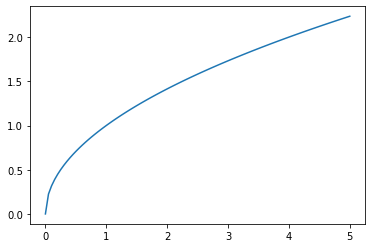

In [28]:
plt.plot(xdata, ydata)

Text(0.5, 1.0, 'My first plot')

Text(0.5, 0, 'x values')

Text(0, 0.5, 'y values')

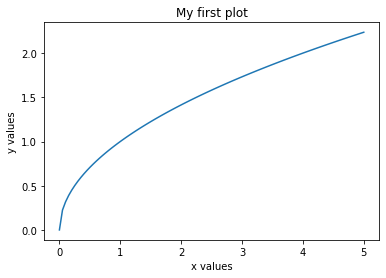

In [62]:
plt.plot(xdata, ydata)
plt.title("My first plot")
plt.xlabel("x values")
plt.ylabel("y values")

Text(0.5, 1.0, 'My first plot')

Text(0.5, 0, 'x values')

Text(0, 0.5, 'y values')

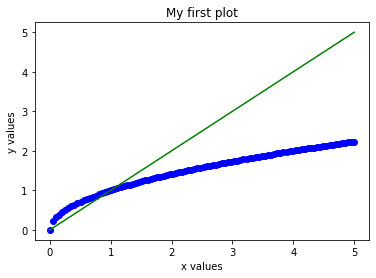

In [63]:
plt.plot(xdata, ydata, "bo", xdata, ydata ** 2, "g-")
plt.title("My first plot")
plt.xlabel("x values")
plt.ylabel("y values")

Text(0.5, 1.0, 'subplot 1')

Text(0.5, 1.0, 'subplot 2')

Text(0.5, 0.98, 'my first subplots')

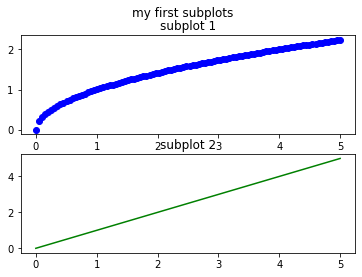

In [64]:
#subplot(nrows, ncols, index)
plt.subplot(2,1,1)
plt.plot(xdata, ydata, "bo")
plt.title("subplot 1")

plt.subplot(2,1,2)
plt.plot(xdata, ydata ** 2, "g-")
plt.title("subplot 2")

plt.suptitle("my first subplots")

Text(0.5, 1.0, 'second subplot')

Text(0.5, 1.0, 'first subplot')

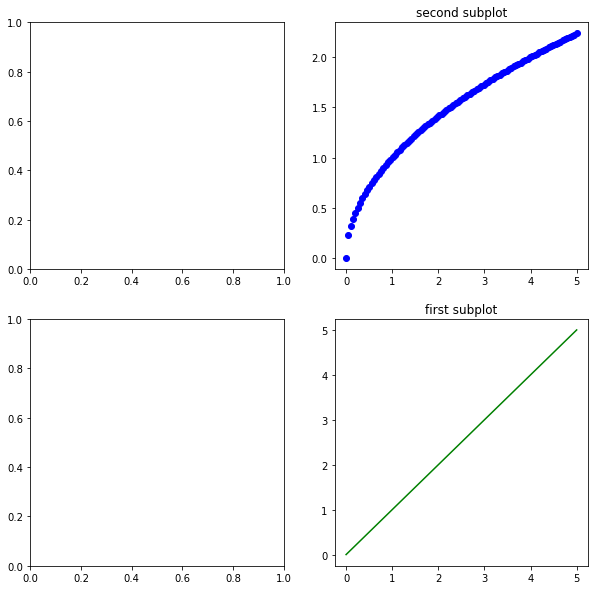

In [65]:
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(10,10))
ax[0,1].plot(xdata, ydata, "bo")
ax[0,1].set_title("second subplot")

ax[1,1].plot(xdata, ydata ** 2, "g-")
ax[1,1].set_title("first subplot")

# Exploratory Data Analysis
We will use Pandas and Matplotlib modules in this workbook. Seaborn module also has good visualizations methods. You are welcome to explore on your own.

In [66]:
#ames = pd.read_csv("AmesHousing.csv", index_col="Order")
#elnino = 
#ames.columns = ames.columns.str.replace(' ', '')
df_elnino.columns = df_elnino.columns.str.replace(' ', '')
#ames.columns = [col.lower() for col in ames]
df_elnino.columns = [col.lower() for col in df_elnino]
#ames.columns
df_elnino.columns

Index(['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec'],
      dtype='object')

In [67]:
df_elnino.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,1950.0,23.11,24.20,25.37,23.86,23.03,21.57,20.63,20.15,19.67,20.03,20.02,21.80
1,1951.0,24.19,25.28,25.60,25.37,24.79,24.69,23.86,22.32,21.44,21.77,22.33,22.89
2,1952.0,24.52,26.21,26.37,24.73,23.71,22.34,20.89,20.02,19.63,20.40,20.77,22.39
3,1953.0,24.15,26.34,27.36,27.03,25.47,23.49,22.20,21.45,21.25,20.95,21.60,22.44
4,1954.0,23.02,25.00,25.33,22.97,21.73,20.77,19.52,19.33,18.95,19.11,20.27,21.30


Text(0.5, 1.0, 'Temperature for January')

Text(0, 0.5, 'Temperature')

Text(0.5, 0, 'Years after 1950')

Text(0.5, 1.0, 'Temperature for January, February, March')

Text(0, 0.5, 'Temperature')

Text(0.5, 0, 'Years after 1950')

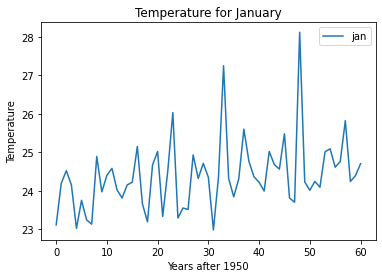

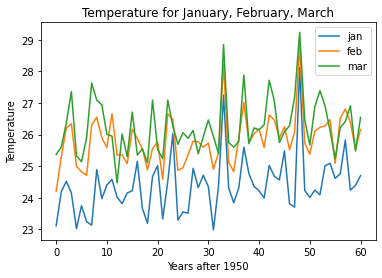

In [174]:
#df_elnino['0'].plot()
#df_elnino.row('0').plot()
df_elnino[['jan']].plot()
plt.title('Temperature for January')
plt.ylabel('Temperature')
plt.xlabel('Years after 1950')

df_elnino[['jan','feb','mar']].plot()
plt.title('Temperature for January, February, March')
plt.ylabel('Temperature')
plt.xlabel('Years after 1950')

### Histogram

Text(0, 0.5, 'Temperature')

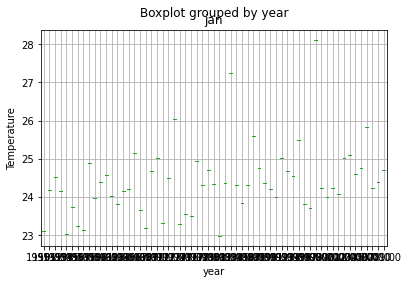

In [173]:
#df_elnino_2.boxplot(column='jan', by='year')
df_elnino.boxplot(column='jan', by='year')
plt.ylabel('Temperature')

In [80]:
bins=[1949,1960,1970,1980,1990,2000,2010]
names = [1,2,3,4,5,6]
df_elnino['yearbuckets']=pd.cut(df_elnino['year'], bins, labels=names)
df_elnino.head()
df_elnino.tail()
#df_elnino.drop(['yearbuckets'], axis = 1, inplace = True)

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,yearbuckets
0,1950.0,23.11,24.20,25.37,23.86,23.03,21.57,20.63,20.15,19.67,20.03,20.02,21.80,1
1,1951.0,24.19,25.28,25.60,25.37,24.79,24.69,23.86,22.32,21.44,21.77,22.33,22.89,1
2,1952.0,24.52,26.21,26.37,24.73,23.71,22.34,20.89,20.02,19.63,20.40,20.77,22.39,1
3,1953.0,24.15,26.34,27.36,27.03,25.47,23.49,22.20,21.45,21.25,20.95,21.60,22.44,1
4,1954.0,23.02,25.00,25.33,22.97,21.73,20.77,19.52,19.33,18.95,19.11,20.27,21.30,1


,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,yearbuckets
56,2006.0,24.76,26.52,26.22,24.29,23.84,22.82,22.20,21.89,21.93,22.46,22.61,24.15,6
57,2007.0,25.82,26.81,26.41,24.96,23.05,21.61,21.05,19.95,19.85,19.31,19.82,21.15,6
58,2008.0,24.24,26.39,26.91,25.68,24.43,23.19,23.02,22.14,21.60,21.39,21.54,22.73,6
59,2009.0,24.39,25.53,25.48,25.84,24.95,24.09,23.09,22.03,21.48,21.64,21.99,23.21,6
60,2010.0,24.70,26.16,26.54,26.04,24.75,23.26,21.11,19.49,19.28,19.73,20.44,22.07,6


Text(0, 0.5, 'Temperature')

Text(0, 0.5, 'Temperature')

Text(0, 0.5, 'Temperature')

Text(0, 0.5, 'Temperature')

Text(0, 0.5, 'Temperature')

Text(0, 0.5, 'Temperature')

Text(0, 0.5, 'Temperature')

Text(0, 0.5, 'Temperature')

Text(0, 0.5, 'Temperature')

Text(0, 0.5, 'Temperature')

Text(0, 0.5, 'Temperature')

Text(0, 0.5, 'Temperature')

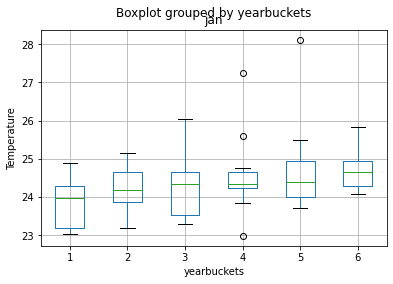

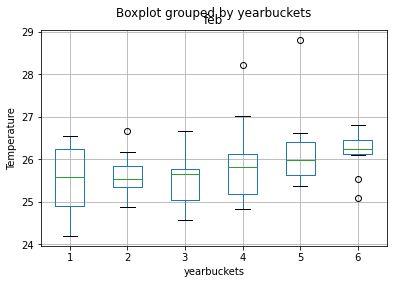

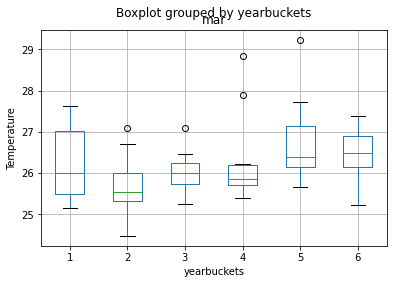

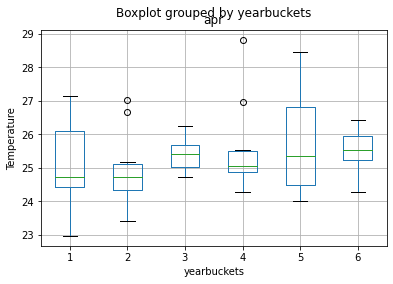

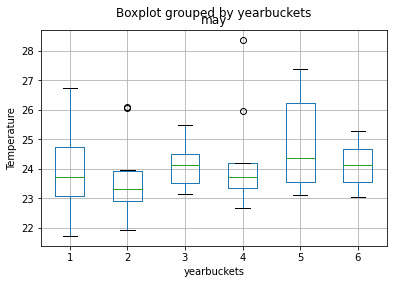

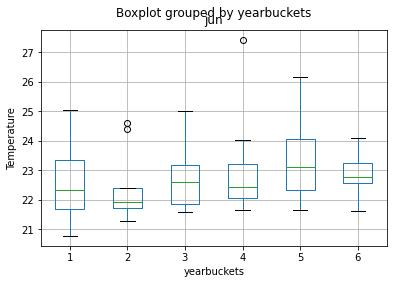

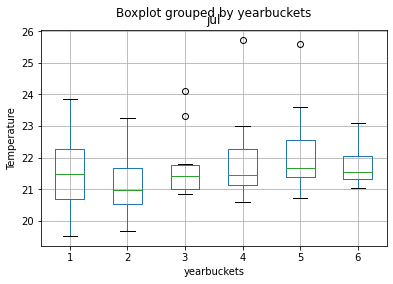

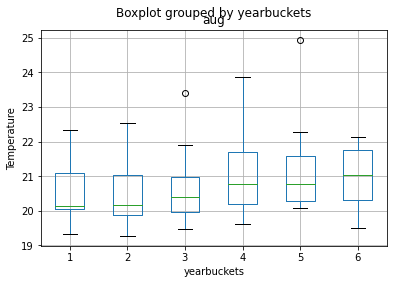

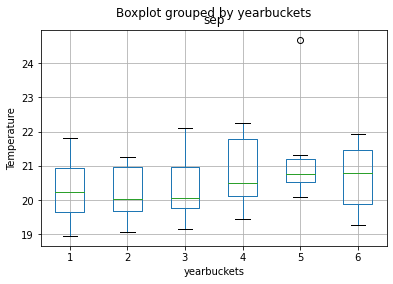

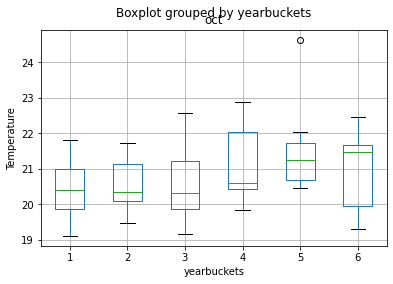

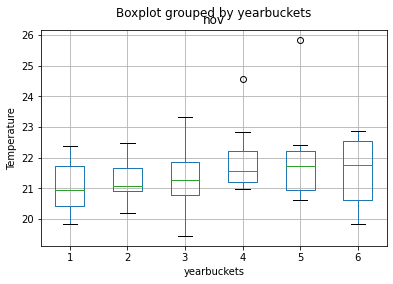

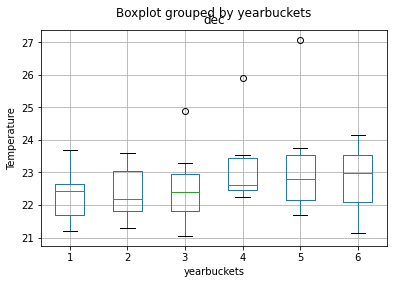

In [172]:
df_elnino.boxplot(column='jan', by='yearbuckets')
plt.ylabel('Temperature')

df_elnino.boxplot(column='feb', by='yearbuckets')
plt.ylabel('Temperature')

df_elnino.boxplot(column='mar', by='yearbuckets')
plt.ylabel('Temperature')

df_elnino.boxplot(column='apr', by='yearbuckets')
plt.ylabel('Temperature')

df_elnino.boxplot(column='may', by='yearbuckets')
plt.ylabel('Temperature')

df_elnino.boxplot(column='jun', by='yearbuckets')
plt.ylabel('Temperature')

df_elnino.boxplot(column='jul', by='yearbuckets')
plt.ylabel('Temperature')

df_elnino.boxplot(column='aug', by='yearbuckets')
plt.ylabel('Temperature')

df_elnino.boxplot(column='sep', by='yearbuckets')
plt.ylabel('Temperature')

df_elnino.boxplot(column='oct', by='yearbuckets')
plt.ylabel('Temperature')

df_elnino.boxplot(column='nov', by='yearbuckets')
plt.ylabel('Temperature')

df_elnino.boxplot(column='dec', by='yearbuckets')
plt.ylabel('Temperature')

### Probability Plot

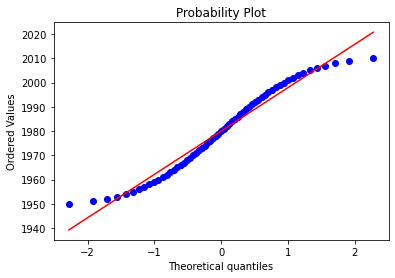

In [72]:
fig = plt.figure()
res = stats.probplot(df_elnino['year'], plot=plt)

### Bar Chart

<BarContainer object of 61 artists>

Text(0.5, 1.0, 'Temperature for February')

Text(0, 0.5, 'Year')

Text(0.5, 0, 'Temperature')

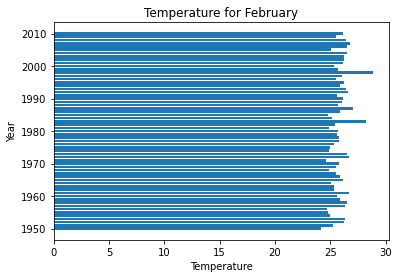

In [170]:
yax = df_elnino.groupby(['year'])['feb'].mean()
plt.barh(yax.index, yax)
plt.title('Temperature for February')
plt.ylabel('Year')
plt.xlabel('Temperature')

Text(0, 0.5, 'Temperature')

Text(0.5, 1.0, 'January & February')

([<matplotlib.axis.XTick at 0x12b58dc10>,
 [Text(0, 0, '1950.0'),
  Text(0, 0, '1951.0'),
  Text(0, 0, '1952.0'),
  Text(0, 0, '1953.0'),
  Text(0, 0, '1954.0'),
  Text(0, 0, '1955.0'),
  Text(0, 0, '1956.0'),
  Text(0, 0, '1957.0'),
  Text(0, 0, '1958.0'),
  Text(0, 0, '1959.0'),
  Text(0, 0, '1960.0'),
  Text(0, 0, '1961.0'),
  Text(0, 0, '1962.0'),
  Text(0, 0, '1963.0'),
  Text(0, 0, '1964.0'),
  Text(0, 0, '1965.0'),
  Text(0, 0, '1966.0'),
  Text(0, 0, '1967.0'),
  Text(0, 0, '1968.0'),
  Text(0, 0, '1969.0'),
  Text(0, 0, '1970.0'),
  Text(0, 0, '1971.0'),
  Text(0, 0, '1972.0'),
  Text(0, 0, '1973.0'),
  Text(0, 0, '1974.0'),
  Text(0, 0, '1975.0'),
  Text(0, 0, '1976.0'),
  Text(0, 0, '1977.0'),
  Text(0, 0, '1978.0'),
  Text(0, 0, '1979.0'),
  Text(0, 0, '1980.0'),
  Text(0, 0, '1981.0'),
  Text(0, 0, '1982.0'),
  Text(0, 0, '1983.0'),
  Text(0, 0, '1984.0'),
  Text(0, 0, '1985.0'),
  Text(0, 0, '1986.0'),
  Text(0, 0, '1987.0'),
  Text(0, 0, '1988.0'),
  Text(0, 0, '1989.0')

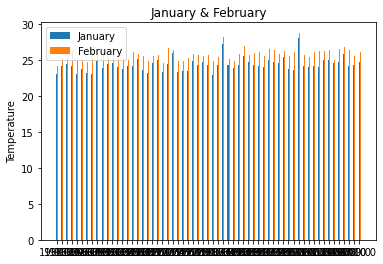

In [74]:
yax1 = df_elnino.groupby(['year'])['jan'].mean()
yax2 = df_elnino.groupby(['year'])['feb'].mean()
ind = np.arange(yax1.shape[0])    # the x locations for the groups
width = 0.20       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, yax1, width)
p2 = plt.bar(ind+ width, yax2, width)
#p2 = plt.bar(ind, yax2, width, bottom=yax1)

#Y axis title
plt.ylabel('Temperature')
#Title
plt.title('January & February')
plt.xlabel('Years')
plt.xticks(ind, yax2.index)
#plt.yticks(np.arange(0, 1000, 8000))
plt.legend((p1[0], p2[0]), ('January', 'February'))

plt.show()

### Boxplot

Text(0.5, 1.0, 'Basic Plot')

{'whiskers': [<matplotlib.lines.Line2D at 0x139f92fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x139fac6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x139f92d90>,
 'medians': [<matplotlib.lines.Line2D at 0x139facd60>,
 'fliers': [<matplotlib.lines.Line2D at 0x139fb7070>,
 'means': []}

Text(0.5, 1.0, 'Temperature for January')

Text(0, 0.5, 'Temperature')

Text(0.5, 0, '')

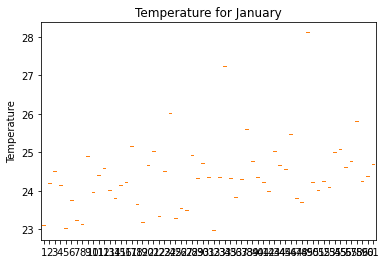

In [160]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df_elnino[['jan']])
plt.title('Temperature for January')
plt.ylabel('Temperature')
plt.xlabel('')

Text(0.5, 1.0, 'Temperature for a 12 month period')

Text(0, 0.5, 'Temperature')

Text(0.5, 0, 'Months')

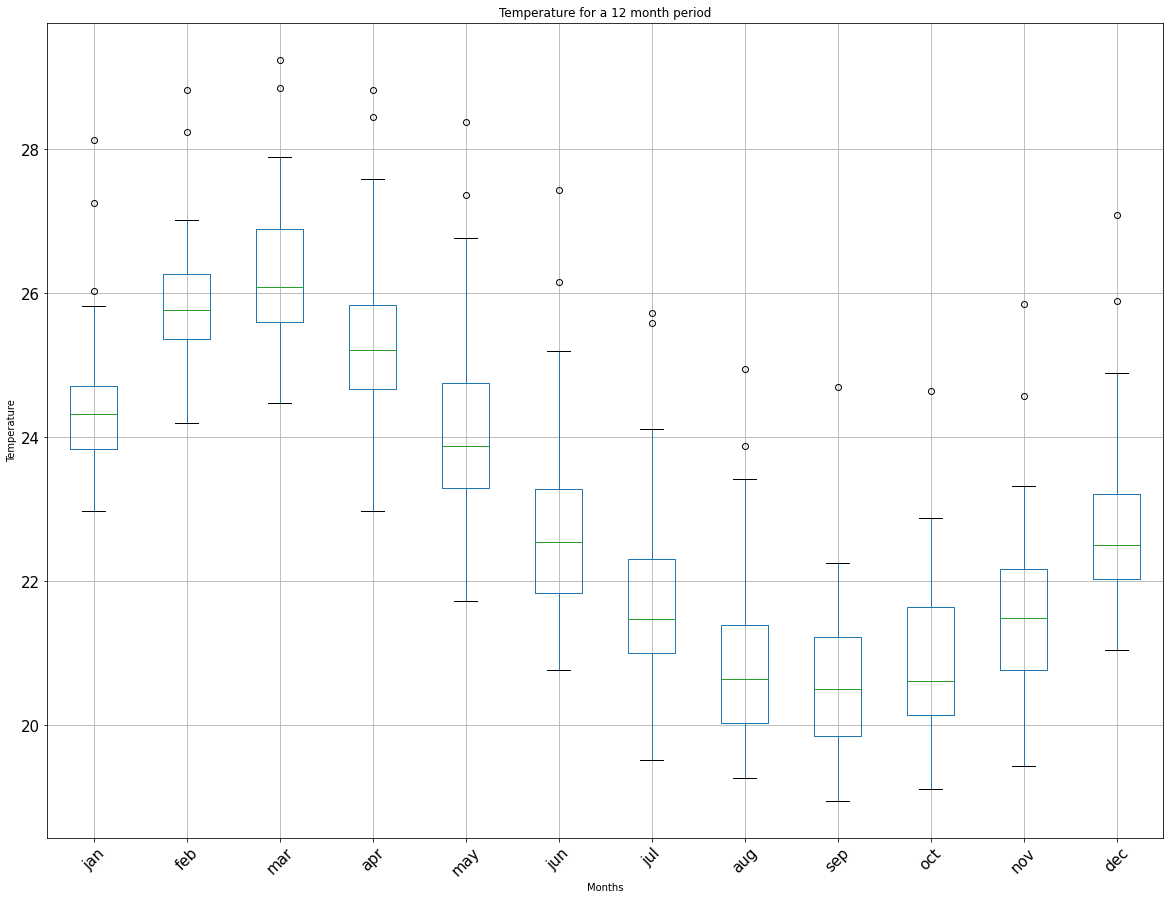

In [159]:
df_elnino[['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']].boxplot(column=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], 
                                           rot=45, fontsize=15, figsize=(20,15))
plt.title('Temperature for a 12 month period')
plt.ylabel('Temperature')
plt.xlabel('Months')

Through this box plot we can clearly see that the temperature fluctuates. During the colder months, the surface temperature increases and during hotter months the surface temperature decreases.

### Scatter Plot

Text(0.5, 1.0, 'Temperature for January')

Text(0, 0.5, 'Temperature')

Text(0.5, 0, 'Year')

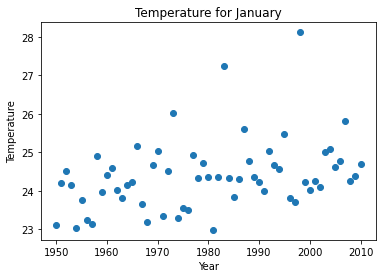

In [158]:
plt.scatter(df_elnino['year'], df_elnino['jan'])
plt.title('Temperature for January')
plt.ylabel('Temperature')
plt.xlabel('Year')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c437d90>,
      dtype=object)

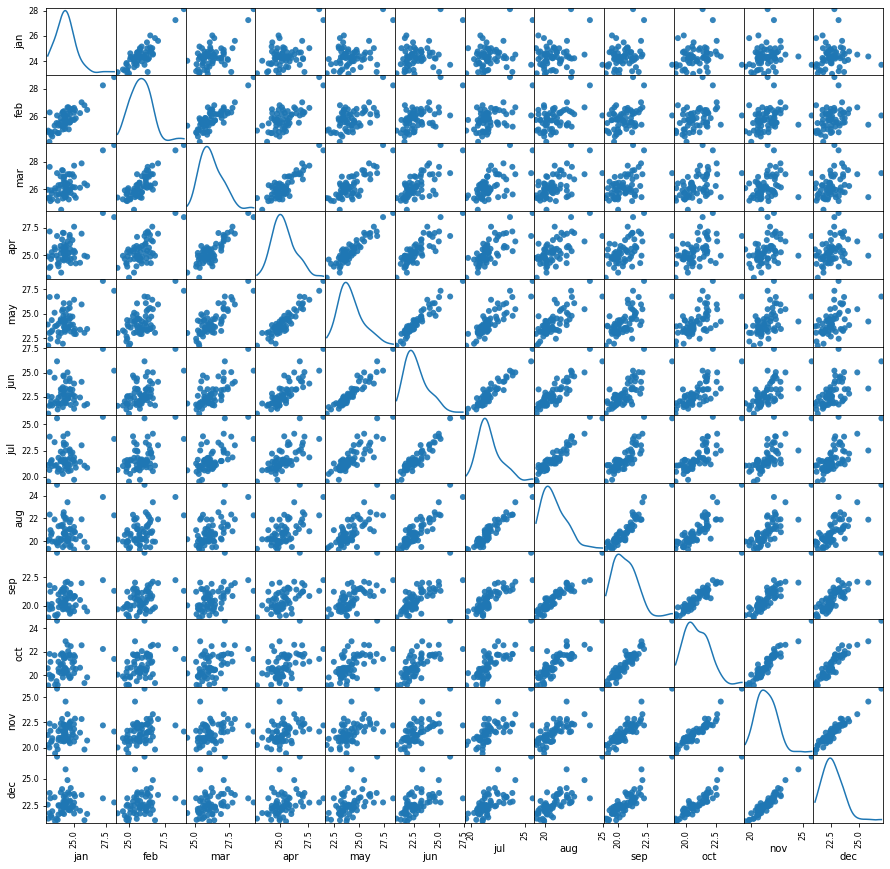

In [78]:
subsetd = df_elnino[['jan','feb','mar', 'apr','may','jun','jul','aug','sep','oct','nov','dec']]
pd.plotting.scatter_matrix(subsetd, alpha=0.9, marker="o", figsize=(15,15),diagonal = 'kde', grid=True)

### Correlation

In [79]:
subsetd.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
jan,1.00,0.83,0.56,0.48,0.39,0.35,0.27,0.19,0.15,0.18,0.12,0.07
feb,0.83,1.00,0.81,0.68,0.62,0.57,0.49,0.44,0.38,0.39,0.31,0.27
mar,0.56,0.81,1.00,0.86,0.81,0.71,0.63,0.56,0.48,0.46,0.36,0.32
apr,0.48,0.68,0.86,1.00,0.92,0.84,0.74,0.63,0.53,0.49,0.41,0.36
may,0.39,0.62,0.81,0.92,1.00,0.94,0.85,0.76,0.67,0.63,0.53,0.50
jun,0.35,0.57,0.71,0.84,0.94,1.00,0.95,0.87,0.78,0.74,0.65,0.61
jul,0.27,0.49,0.63,0.74,0.85,0.95,1.00,0.95,0.85,0.79,0.69,0.66
aug,0.19,0.44,0.56,0.63,0.76,0.87,0.95,1.00,0.93,0.86,0.78,0.76
sep,0.15,0.38,0.48,0.53,0.67,0.78,0.85,0.93,1.00,0.94,0.89,0.86
oct,0.18,0.39,0.46,0.49,0.63,0.74,0.79,0.86,0.94,1.00,0.94,0.93


# What happens to the temperature during a month over the course of the years?
### We can tell that for january the temperature keeps increasing, however it is does not apply to all the months, for certain months the temperature fluctuates.

# What months can we see the temperature changing the most?
### The colder months like november, december, and january seem to have an incline in the surface temperature

#
### 

### Loading Data

In [54]:
#ames = pd.read_csv("AmesHousing.csv", index_col="Order")
# Check dimensions of the data
print(" Dimensions of the imported dataset is: " + str(df_elnino.shape))

 Dimensions of the imported dataset is: (61, 14)


In [55]:
# Print top 2 rows in the dataset
df_elnino.head(4)

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,Yearbuckets
0,1950.0,23.11,24.20,25.37,23.86,23.03,21.57,20.63,20.15,19.67,20.03,20.02,21.80,NaN
1,1951.0,24.19,25.28,25.60,25.37,24.79,24.69,23.86,22.32,21.44,21.77,22.33,22.89,NaN
2,1952.0,24.52,26.21,26.37,24.73,23.71,22.34,20.89,20.02,19.63,20.40,20.77,22.39,NaN
3,1953.0,24.15,26.34,27.36,27.03,25.47,23.49,22.20,21.45,21.25,20.95,21.60,22.44,NaN


In [56]:
df_elnino.columns = df_elnino.columns.str.replace(' ', '')
df_elnino.columns = [col.lower() for col in df_elnino]
#ames.columns

In [57]:
# Marking the features or columns as numeric or categorical for easy referencce later in the code
numericfeatures = [f for f in df_elnino.columns if df_elnino.dtypes[f] != 'object']
print("Number of Numerical features: ", len(numericfeatures))

categoricalfeatures = [f for f in df_elnino.columns if df_elnino.dtypes[f] == 'object']
print("Number of Categorical features: ", len(categoricalfeatures))

Number of Numerical features:  14
Number of Categorical features:  0


In [58]:
print("numeric features: " + str(numericfeatures))
print("categorical features: " + str(categoricalfeatures))

numeric features: ['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'yearbuckets']
categorical features: []


count    61.000000
mean     24.392131
std       0.913946
min      22.980000
25%      23.840000
50%      24.320000
75%      24.710000
max      28.120000
Name: jan, dtype: float64

count    61.000000
mean     25.839344
std       0.800560
min      24.200000
25%      25.360000
50%      25.770000
75%      26.270000
max      28.820000
Name: feb, dtype: float64

Text(0.5, 0, 'Temperature')

Text(0.5, 1.0, 'January & February')

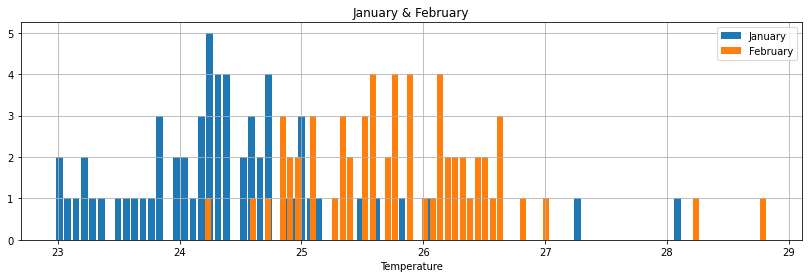

In [155]:
# What is the distribution of 
df_elnino['jan'].hist(bins=75, rwidth=.8, figsize=(10,3))
df_elnino['jan'].describe()

df_elnino['feb'].hist(bins=75, rwidth=.8, figsize=(14,4))
df_elnino['feb'].describe()

#Y axis title
plt.xlabel('Temperature')
#Title
plt.title('January & February')
#X axis data
#plt.xticks(ind, yax2.index)
#plt.yticks(np.arange(0, 1000, 8000))
plt.legend((p1[0], p2[0]), ('January', 'February'))
#plt.legend(p1[0], 'January')

plt.show()

<bound method DataFrame.info of       year    jan    feb    mar    apr    may    jun    jul    aug    sep  \
0   1950.0  23.11  24.20  25.37  23.86  23.03  21.57  20.63  20.15  19.67   
1   1951.0  24.19  25.28  25.60  25.37  24.79  24.69  23.86  22.32  21.44   
2   1952.0  24.52  26.21  26.37  24.73  23.71  22.34  20.89  20.02  19.63   
3   1953.0  24.15  26.34  27.36  27.03  25.47  23.49  22.20  21.45  21.25   
4   1954.0  23.02  25.00  25.33  22.97  21.73  20.77  19.52  19.33  18.95   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
56  2006.0  24.76  26.52  26.22  24.29  23.84  22.82  22.20  21.89  21.93   
57  2007.0  25.82  26.81  26.41  24.96  23.05  21.61  21.05  19.95  19.85   
58  2008.0  24.24  26.39  26.91  25.68  24.43  23.19  23.02  22.14  21.60   
59  2009.0  24.39  25.53  25.48  25.84  24.95  24.09  23.09  22.03  21.48   
60  2010.0  24.70  26.16  26.54  26.04  24.75  23.26  21.11  19.49  19.28   

      oct    nov    dec yearbuckets  log_ye

Text(0.5, 1.0, 'Box plot Water Temperature')

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Temperature')

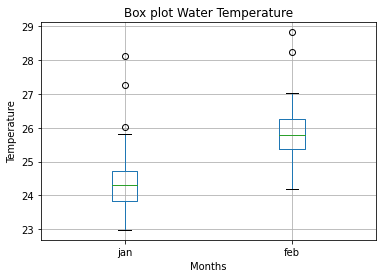

In [153]:
# Date range in the data
#yax = df_elnino.groupby(['year'])['feb'].count()
#df_elnino[['feb']].boxplot(column=['feb'], 
#                                           rot=45, fontsize=15, figsize=(20,15))
#plt.bar(yax.index, yax)
#df_elnino.boxplot(df_elnino[['feb']])
df_elnino.info
df_elnino.boxplot(column=['jan','feb'])
plt.title('Box plot Water Temperature')
plt.xlabel('Months')
plt.ylabel('Temperature')

If we focus on a two month period, we can observe the temperature in the surface increases.

In [87]:
#from datetime import date
#date_temp = pd.DataFrame({'year': df_elnino['year'], 'month' : df_elnino['jan']})

#DATE = []
#for yr, mo in zip(date_temp.year, date_temp.month):
#    DATE.append(date(yr, mo, 10))

#df_elnino['year'] = DATE
#df_elnino.head()

Text(0.5, 1.0, 'Seasonality in Water Temperature')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Temperature')

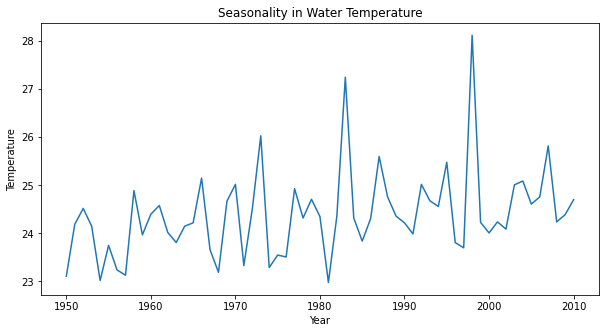

In [95]:
# Is there seasonality in temp
df_elnino.groupby(['year']).jan.mean().plot(kind='line', figsize=(10,5))
plt.title('Seasonality in Water Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature')

The Surface Temperature reflects increasing spikes around 1980 and 2000, overall the graph shows an increase in temperature over time.

## Clean Data
1. Drop Duplicates
2. Handle missing values

#### Check and Drop Duplicates

In [63]:
# Drop duplicates
before = df_elnino.shape[0]
df_elnino.drop_duplicates(inplace = True, keep = 'last')
rows_dropped = before - df_elnino.shape[0]
print(str(rows_dropped) + ' ' +  "duplicate rows dropped from the the dataset")

0 duplicate rows dropped from the the dataset


#### Check and Handle Missing Values

In [64]:
#Check for missing values
print("Columns by % of missing values in descending order")
df_elnino.isnull().sum()[df_elnino.isnull().sum()>0].sort_values(ascending = False)*100/df_elnino.shape[0]

Columns by % of missing values in descending order


yearbuckets    18.032787
dtype: float64

In [65]:
# Since most of the categorical data that is missing is due to absence of feature in the home. 
# So we are imputing the missing values with "none" 
# Impute missing values


for col in categoricalfeatures:
    df_elnino[col].fillna('none',inplace=True)

In [66]:
# To illustrate, we are imputing the missing values for numeric features with median.
df_elnino.fillna(df_elnino.median(), inplace=True)

In [67]:
#Check for missing values
print("Columns by % of missing values in descending order")
df_elnino.isnull().sum()[df_elnino.isnull().sum()>0].sort_values(ascending = False)*100/df_elnino.shape[0]

Columns by % of missing values in descending order


yearbuckets    18.032787
dtype: float64

## EDA

### Univariate

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12936bbe0>,
      dtype=object)

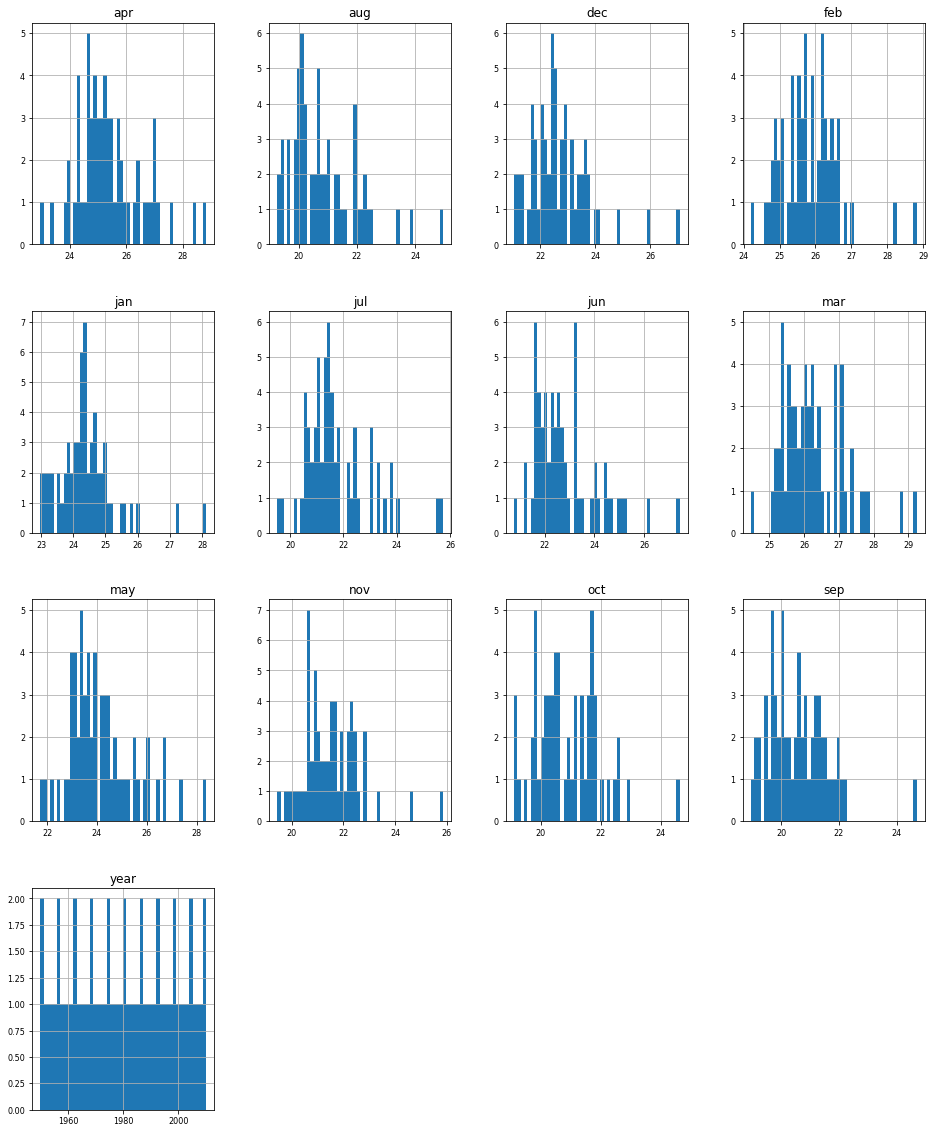

In [68]:
# plot histogram chart
df_elnino[numericfeatures].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
    

The graphs show that January, February, March and April reach temperatures up to 29 degrees Celcius, while, in hotter months such as July, August, September, October, and November the surface temperature decreases, it drops lower than 20 degrees.

In [69]:
for col in list(categoricalfeatures) :
    print(df_elnino[col].value_counts())
    print('#'*50)

In [70]:
# Drop categorical features that are highly skewed 
#before = df_elnino.shape[1]
#drop_cols =  ['jul', 'aug','sep', 'oct', 'nov', 'dec']
#df_elnino.drop(drop_cols, axis = 1, inplace = True)
#columns_dropped = before - df_elnino.shape[1]
#print(str(columns_dropped) + ' ' + 'columns dropped from the original dataset')

## Feature Engineering 
1. Create categorical features
2. Take math transformation

In [105]:
df_elnino['log_year'] = np.log(df_elnino['year'])

In [106]:
#df_elnino['age']= df_elnino['yrsold']-df_elnino['yearbuilt']

In [107]:
#ames['totalbath'] = ames['fullbath'] + ames['halfbath']*0.5 + ames['bsmtfullbath'] + ames['bsmthalfbath']*0.5
#ames['totalsqft']= ames['totalbsmtsf'] + ames['1stflrsf'] + ames['2ndflrsf']

In [108]:
#neighmap  = {'NoRidge':3,'NridgHt':3, 'Somerst':3,
#             'NAmes':1,'Sawyer':1,'OldTown':1,'Edwards':1,'BrkSide':1, 
#             'CollgCr':2, 'NWAmes': 2, 'SawyerW':2, 'Mitchel':2, 'Crawfor': 2, 'IDOTRR': 2, 'Timber': 2,
#             'StoneBr': 2, 'SWISU': 2, 'ClearCr': 2, 'MeadowV': 2, 'BrDale': 2, 'Blmngtn': 2, 'Veenker':2,
#             'NPkVill': 2, 'Blueste': 2, 'Greens': 2, 'GrnHill': 2, 'Landmrk': 2, 'Crawfor': 2, 'Gilbert':2}
#df_elnino['Yearbuckets'] = df_elnino[''].map(neighmap)

In [109]:
df_elnino.head(3)

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,yearbuckets,log_year
0,1950.0,23.11,24.20,25.37,23.86,23.03,21.57,20.63,20.15,19.67,20.03,20.02,21.80,1,7.575585
1,1951.0,24.19,25.28,25.60,25.37,24.79,24.69,23.86,22.32,21.44,21.77,22.33,22.89,1,7.576097
2,1952.0,24.52,26.21,26.37,24.73,23.71,22.34,20.89,20.02,19.63,20.40,20.77,22.39,1,7.576610


In [110]:
# created boolean features
#df_elnino['hasbasement'] = df_elnino.totalbsmtsf.apply(lambda x: 1 if x > 0 else 0)
#df_elnino['hasgarage'] = df_elnino.garagearea.apply(lambda x: 1 if x > 0 else 0)
#df_elnino['haspool'] = df_elnino.poolarea.apply(lambda x: 1 if x > 0 else 0)
#df_elnino['wasremodeled'] = (df_elnino['yearremod/add'] != df_elnino.yearbuilt).astype(np.int64)

In [111]:
# Marking the features or columns as numeric or categorical for easy referencce later in the code
numericfeatures = [f for f in df_elnino.columns if df_elnino.dtypes[f] != 'object']
print("Number of Numerical features: ", len(numericfeatures))

categoricalfeatures = [f for f in df_elnino.columns if df_elnino.dtypes[f] == 'object']
print("Number of Categorical features: ", len(categoricalfeatures))

Number of Numerical features:  15
Number of Categorical features:  0


## Visualization

### Univariate

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e71a5b0>,
      dtype=object)

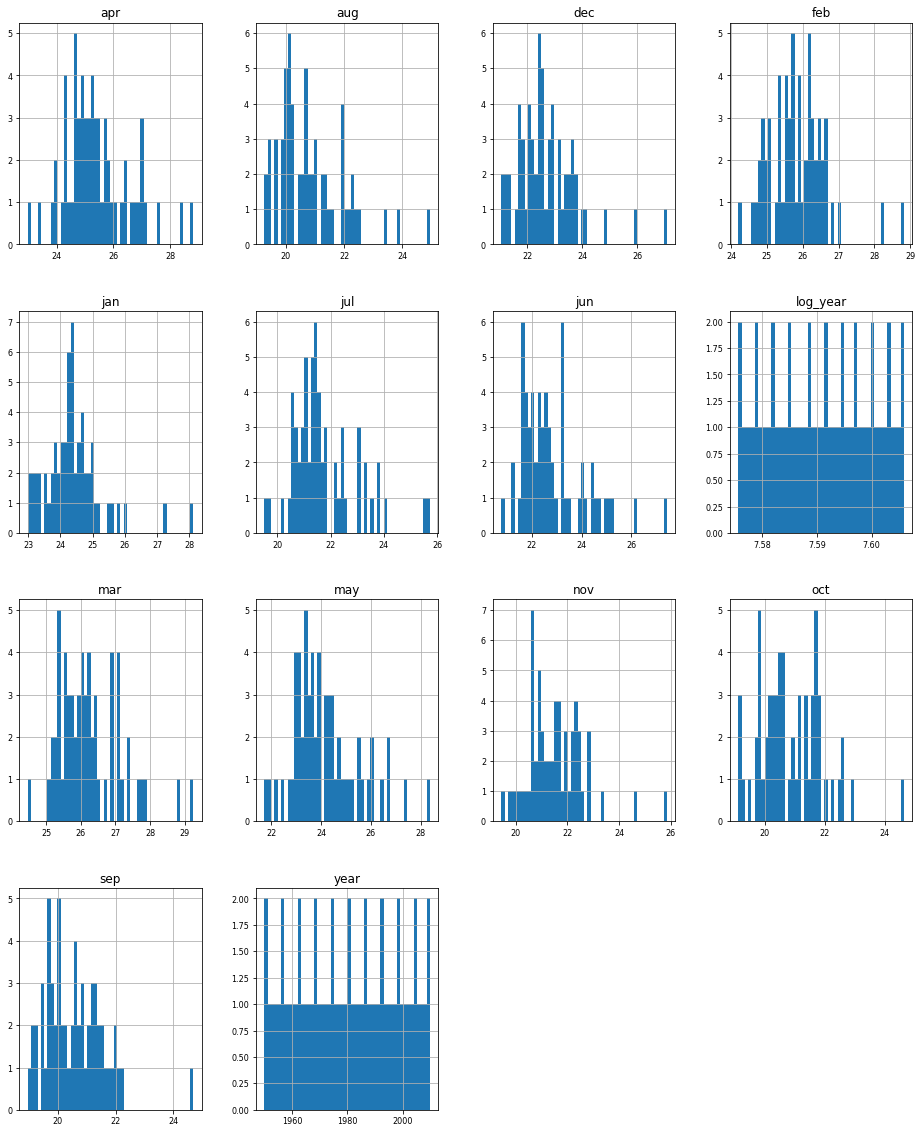

In [112]:
df_elnino[numericfeatures].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [113]:
#for col in list(categoricalfeatures) :
#    print(df_elnino[col].value_counts())
#    print('#'*50)

### Bivariate

In [114]:
df_elnino_corr = df_elnino.corr()
df_elnino_corr['year'].sort_values(ascending=False)
#df_elnino['log_year'] = np.log(df_elnino['year'])

year        1.000000
log_year    0.999992
jan         0.349251
feb         0.336997
oct         0.263916
sep         0.245006
dec         0.242398
mar         0.235429
nov         0.206821
apr         0.195306
aug         0.176357
may         0.174057
jul         0.166010
jun         0.159695
Name: year, dtype: float64

In [115]:
subsetd = df_elnino[['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']]
#pd.plotting.scatter_matrix(Months, alpha=0.9, marker="o", figsize=(15,15),diagonal = 'kde', grid=True)

Text(0.5, 1.0, 'Water Temperature')

Text(0, 0.5, '')

Text(0.5, 0, 'Temperature')

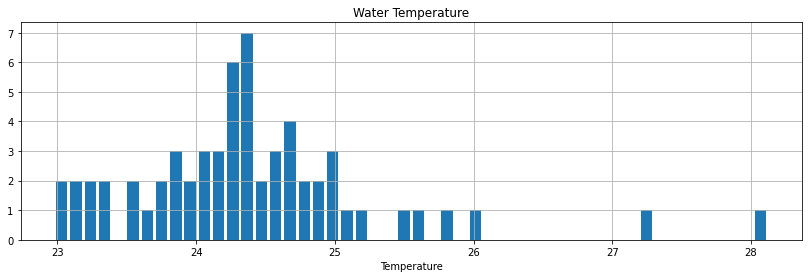

Text(0.5, 1.0, 'Water Temperature')

Text(0, 0.5, '')

Text(0.5, 0, 'Temperature')

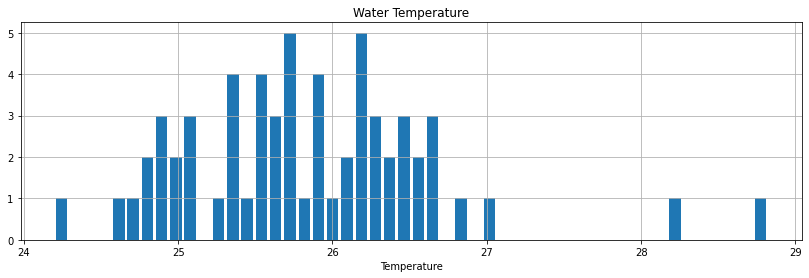

Text(0.5, 1.0, 'Water Temperature')

Text(0, 0.5, '')

Text(0.5, 0, 'Temperature')

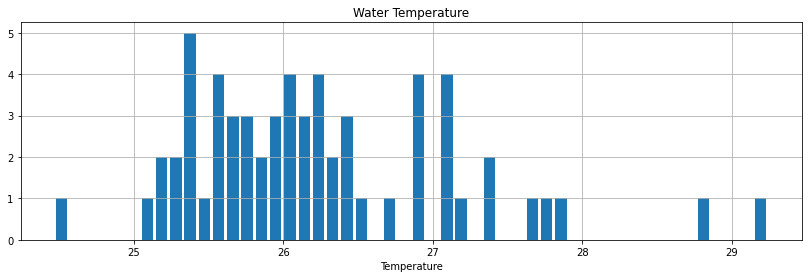

In [134]:
plt.title('Water Temperature')
plt.ylabel('')
plt.xlabel('Temperature')
subsetd['jan'].hist(bins=50, rwidth=.8, figsize=(14,4))
plt.show()

plt.title('Water Temperature')
plt.ylabel('')
plt.xlabel('Temperature')
subsetd['feb'].hist(bins=50, rwidth=.8, figsize=(14,4))
plt.show()

plt.title('Water Temperature')
plt.ylabel('')
plt.xlabel('Temperature')
subsetd['mar'].hist(bins=50, rwidth=.8, figsize=(14,4))
plt.show()

Throughout colder months the surface temperature increases but it stays between 23 - 27 degrees. However, we can observe that the temperature can reach levels of up to 29 degrees.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x132960c70>,
      dtype=object)

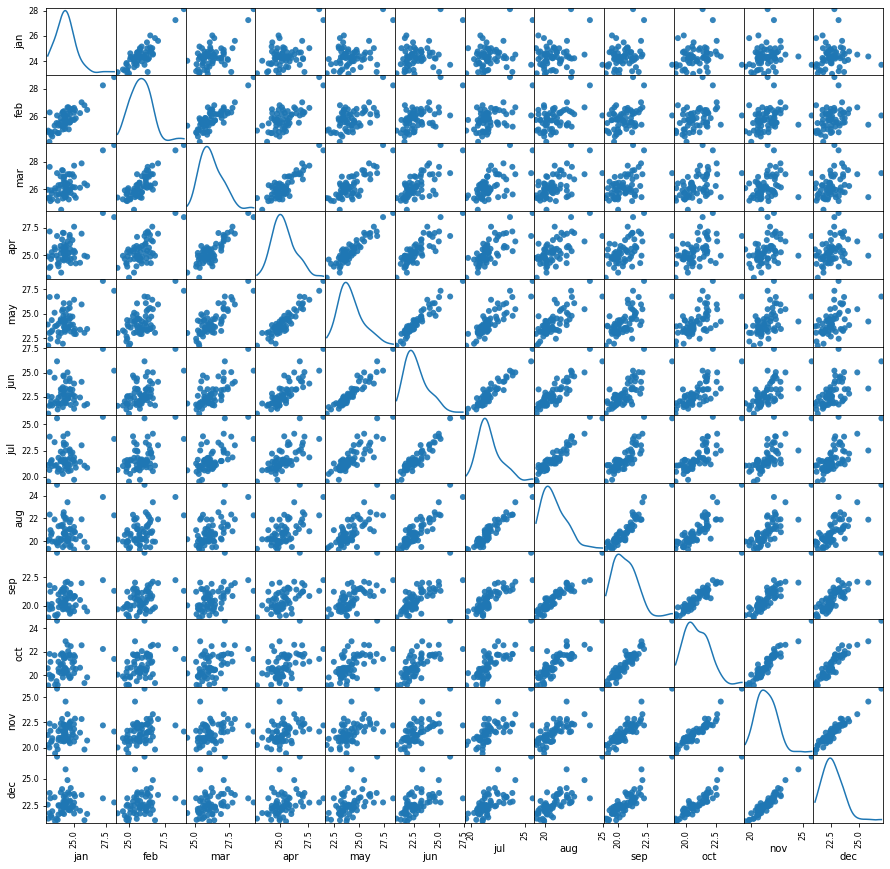

In [118]:
subsetd = df_elnino[['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']]
pd.plotting.scatter_matrix(subsetd, alpha=0.9, marker="o", figsize=(15,15),diagonal = 'kde', grid=True)

## Hypothesis Testing

In [119]:
subsetd = df_elnino[['year','yearbuckets','log_year','jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']]

In [120]:
from scipy.stats import shapiro
series_2test = df_elnino[['jan']]
stat, p = shapiro(series_2test)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.887, p=0.000
Probably not Gaussian


In [121]:
df_elnino['log_year'] = np.log(df_elnino['year'])

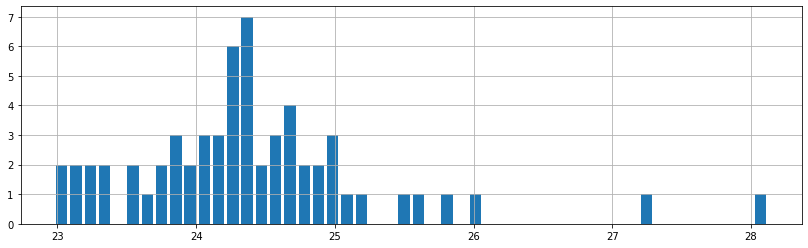

count    61.000000
mean     24.392131
std       0.913946
min      22.980000
25%      23.840000
50%      24.320000
75%      24.710000
max      28.120000
Name: jan, dtype: float64

((array([-2.28017173, -1.92017484, -1.7091256 , -1.55469152, -1.43036801,
         -1.3249031 , -1.23241216, -1.14940983, -1.07365152, -1.00360143,
         -0.93815914, -0.87650695, -0.81801894, -0.76220403, -0.70866868,
         -0.65709167, -0.60720655, -0.55878903, -0.51164772, -0.46561731,
         -0.42055328, -0.37632784, -0.33282677, -0.28994682, -0.24759369,
         -0.20568029, -0.16412527, -0.12285188, -0.08178679, -0.04085922,
          0.        ,  0.04085922,  0.08178679,  0.12285188,  0.16412527,
          0.20568029,  0.24759369,  0.28994682,  0.33282677,  0.37632784,
          0.42055328,  0.46561731,  0.51164772,  0.55878903,  0.60720655,
          0.65709167,  0.70866868,  0.76220403,  0.81801894,  0.87650695,
          0.93815914,  1.00360143,  1.07365152,  1.14940983,  1.23241216,
          1.3249031 ,  1.43036801,  1.55469152,  1.7091256 ,  1.92017484,
          2.28017173]),
  array([22.98, 23.02, 23.11, 23.13, 23.19, 23.24, 23.29, 23.33, 23.51,
         23.55, 

Text(0, 0.5, 'Surf. Temp.')

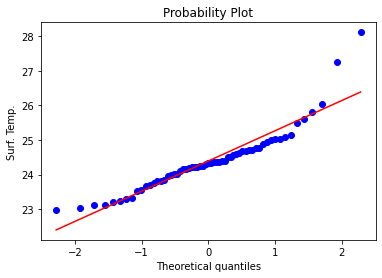

((array([-2.28017173, -1.92017484, -1.7091256 , -1.55469152, -1.43036801,
         -1.3249031 , -1.23241216, -1.14940983, -1.07365152, -1.00360143,
         -0.93815914, -0.87650695, -0.81801894, -0.76220403, -0.70866868,
         -0.65709167, -0.60720655, -0.55878903, -0.51164772, -0.46561731,
         -0.42055328, -0.37632784, -0.33282677, -0.28994682, -0.24759369,
         -0.20568029, -0.16412527, -0.12285188, -0.08178679, -0.04085922,
          0.        ,  0.04085922,  0.08178679,  0.12285188,  0.16412527,
          0.20568029,  0.24759369,  0.28994682,  0.33282677,  0.37632784,
          0.42055328,  0.46561731,  0.51164772,  0.55878903,  0.60720655,
          0.65709167,  0.70866868,  0.76220403,  0.81801894,  0.87650695,
          0.93815914,  1.00360143,  1.07365152,  1.14940983,  1.23241216,
          1.3249031 ,  1.43036801,  1.55469152,  1.7091256 ,  1.92017484,
          2.28017173]),
  array([3.13462427, 3.1363634 , 3.14026542, 3.14113048, 3.14372115,
         3.14587493

Text(0, 0.5, 'log Surf. Temp.')

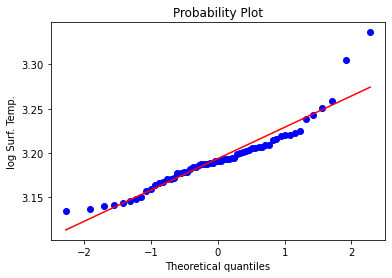

In [122]:
df_elnino['jan'].hist(bins=50, rwidth=.8, figsize=(14,4))
plt.show()
df_elnino['jan'].describe()

stats.probplot(df_elnino['jan'], plot=plt)
plt.ylabel('Surf. Temp.')
plt.show()
stats.probplot(np.log(df_elnino['jan']), plot=plt)
plt.ylabel('log Surf. Temp.')
plt.show()

The average temperature for January is 24.39 but the majority stays closer to the 23 - 26 range. There seems to be a positive correlation with the log surface temperature. The probability plots show very similar results.

## Predictive Modeling

In [123]:
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

df_elnino
X = df_elnino.drop(['log_year'], axis = 1)
X
y = df_elnino["log_year"]
y
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)
x_train.shape
x_test.shape
y_train.shape
y_test.shape

#target= subsetd['log_year']
#df_train = subsetd.drop(['log_year'],axis=1)
# Split data into train and test
#df_elnino_train = pd.concat([x_train, y_train], axis=1)
#ames_train.head()
#df_elnino_test = pd.concat([x_test, y_test], axis=1)

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,yearbuckets,log_year
0,1950.0,23.11,24.20,25.37,23.86,23.03,21.57,20.63,20.15,19.67,20.03,20.02,21.80,1,7.575585
1,1951.0,24.19,25.28,25.60,25.37,24.79,24.69,23.86,22.32,21.44,21.77,22.33,22.89,1,7.576097
2,1952.0,24.52,26.21,26.37,24.73,23.71,22.34,20.89,20.02,19.63,20.40,20.77,22.39,1,7.576610
3,1953.0,24.15,26.34,27.36,27.03,25.47,23.49,22.20,21.45,21.25,20.95,21.60,22.44,1,7.577122
4,1954.0,23.02,25.00,25.33,22.97,21.73,20.77,19.52,19.33,18.95,19.11,20.27,21.30,1,7.577634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2006.0,24.76,26.52,26.22,24.29,23.84,22.82,22.20,21.89,21.93,22.46,22.61,24.15,6,7.603898
57,2007.0,25.82,26.81,26.41,24.96,23.05,21.61,21.05,19.95,19.85,19.31,19.82,21.15,6,7.604396
58,2008.0,24.24,26.39,26.91,25.68,24.43,23.19,23.02,22.14,21.60,21.39,21.54,22.73,6,7.604894
59,2009.0,24.39,25.53,25.48,25.84,24.95,24.09,23.09,22.03,21.48,21.64,21.99,23.21,6,7.605392


,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,yearbuckets
0,1950.0,23.11,24.20,25.37,23.86,23.03,21.57,20.63,20.15,19.67,20.03,20.02,21.80,1
1,1951.0,24.19,25.28,25.60,25.37,24.79,24.69,23.86,22.32,21.44,21.77,22.33,22.89,1
2,1952.0,24.52,26.21,26.37,24.73,23.71,22.34,20.89,20.02,19.63,20.40,20.77,22.39,1
3,1953.0,24.15,26.34,27.36,27.03,25.47,23.49,22.20,21.45,21.25,20.95,21.60,22.44,1
4,1954.0,23.02,25.00,25.33,22.97,21.73,20.77,19.52,19.33,18.95,19.11,20.27,21.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2006.0,24.76,26.52,26.22,24.29,23.84,22.82,22.20,21.89,21.93,22.46,22.61,24.15,6
57,2007.0,25.82,26.81,26.41,24.96,23.05,21.61,21.05,19.95,19.85,19.31,19.82,21.15,6
58,2008.0,24.24,26.39,26.91,25.68,24.43,23.19,23.02,22.14,21.60,21.39,21.54,22.73,6
59,2009.0,24.39,25.53,25.48,25.84,24.95,24.09,23.09,22.03,21.48,21.64,21.99,23.21,6


0     7.575585
1     7.576097
2     7.576610
3     7.577122
4     7.577634
        ...   
56    7.603898
57    7.604396
58    7.604894
59    7.605392
60    7.605890
Name: log_year, Length: 61, dtype: float64

(40, 14)

(21, 14)

(40,)

(21,)

In [124]:
x_train.shape
x_test.shape

(40, 14)

(21, 14)

In [125]:
formula = 'jan ~ feb'
df_elnino_model = ols(formula, data=x_train).fit()
print(df_elnino_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    jan   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     111.1
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           7.78e-13
Time:                        11:27:18   Log-Likelihood:                -27.742
No. Observations:                  40   AIC:                             59.48
Df Residuals:                      38   BIC:                             62.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6363      2.475     -0.661      0.5

In [126]:
print('Parameters: ', df_elnino_model.params)
print('R2: ', df_elnino_model.rsquared)

print('Standard errors: ', df_elnino_model.bse)
print('Predicted values: ', df_elnino_model.predict())


## Ref:https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

Parameters:  Intercept   -1.636258
feb          1.009850
dtype: float64
R2:  0.7450783092814045
Standard errors:  Intercept    2.474642
feb          0.095823
dtype: float64
Predicted values:  [24.21590928 25.24595657 23.70088563 23.48881707 25.43782812 24.40778083
 24.79152394 23.42822606 23.50901408 24.49866736 24.85211496 24.37748532
 25.013691   25.17526705 23.97354521 23.55950659 25.64989668 24.15531826
 24.87231196 27.46762718 25.09447902 24.35728832 23.89275719 23.96344671
 24.13512126 23.47871857 23.31714253 25.10457753 24.51886436 23.99374222
 23.18586199 24.17551527 24.51886436 24.6400464  25.14497154 24.96319849
 22.80211888 24.89250897 24.70063741 24.50876586]


In [127]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train,y_train)
print(lin_reg.fit)
print(lin_reg.intercept_)
coeff_df = pd.DataFrame(lin_reg.coef_, x_train.columns, columns=['Coefficient'])
coeff_df

LinearRegression(normalize=True)

<bound method LinearRegression.fit of LinearRegression(normalize=True)>
6.582104190707121


,Coefficient
year,0.000510
jan,0.000009
feb,-0.000014
mar,-0.000015
apr,-0.000004
may,0.000052
jun,-0.000054
jul,0.000008
aug,-0.000002
sep,-0.000023


In [128]:
subsetd.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,year,log_year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
year,1.00,1.00,0.35,0.34,0.24,0.20,0.17,0.16,0.17,0.18,0.25,0.26,0.21,0.24
log_year,1.00,1.00,0.35,0.34,0.24,0.20,0.17,0.16,0.17,0.18,0.25,0.26,0.21,0.24
jan,0.35,0.35,1.00,0.83,0.56,0.48,0.39,0.35,0.27,0.19,0.15,0.18,0.12,0.07
feb,0.34,0.34,0.83,1.00,0.81,0.68,0.62,0.57,0.49,0.44,0.38,0.39,0.31,0.27
mar,0.24,0.24,0.56,0.81,1.00,0.86,0.81,0.71,0.63,0.56,0.48,0.46,0.36,0.32
apr,0.20,0.20,0.48,0.68,0.86,1.00,0.92,0.84,0.74,0.63,0.53,0.49,0.41,0.36
may,0.17,0.17,0.39,0.62,0.81,0.92,1.00,0.94,0.85,0.76,0.67,0.63,0.53,0.50
jun,0.16,0.16,0.35,0.57,0.71,0.84,0.94,1.00,0.95,0.87,0.78,0.74,0.65,0.61
jul,0.17,0.17,0.27,0.49,0.63,0.74,0.85,0.95,1.00,0.95,0.85,0.79,0.69,0.66
aug,0.18,0.18,0.19,0.44,0.56,0.63,0.76,0.87,0.95,1.00,0.93,0.86,0.78,0.76


In [129]:
pd.melt(df_elnino, id_vars= ["year"], value_vars = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])

,year,variable,value
0,1950.0,jan,23.11
1,1951.0,jan,24.19
2,1952.0,jan,24.52
3,1953.0,jan,24.15
4,1954.0,jan,23.02
...,...,...,...
727,2006.0,dec,24.15
728,2007.0,dec,21.15
729,2008.0,dec,22.73
730,2009.0,dec,23.21


In [130]:
temp = pd.melt(df_elnino, id_vars= ["year"], value_vars = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
temp.rename(columns ={'year' : 'Year' , 'variable' : 'Months' , 'value' : 'Surftemp'})
#print(df.rename(columns={'A': 'a', 'C': 'c'}))

,Year,Months,Surftemp
0,1950.0,jan,23.11
1,1951.0,jan,24.19
2,1952.0,jan,24.52
3,1953.0,jan,24.15
4,1954.0,jan,23.02
...,...,...,...
727,2006.0,dec,24.15
728,2007.0,dec,21.15
729,2008.0,dec,22.73
730,2009.0,dec,23.21


### Time Series 

In [131]:
df_elnino_ts = pd.DataFrame(df_elnino.groupby(['year']).jan.mean())
df_elnino_ts.info()
df_elnino_ts.head()
df_elnino_ts.tail()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 61 entries, 1950.0 to 2010.0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   jan     61 non-null     float64
dtypes: float64(1)
memory usage: 976.0 bytes


,jan
year,
1950.0,23.11
1951.0,24.19
1952.0,24.52
1953.0,24.15
1954.0,23.02


,jan
year,
2006.0,24.76
2007.0,25.82
2008.0,24.24
2009.0,24.39
2010.0,24.70


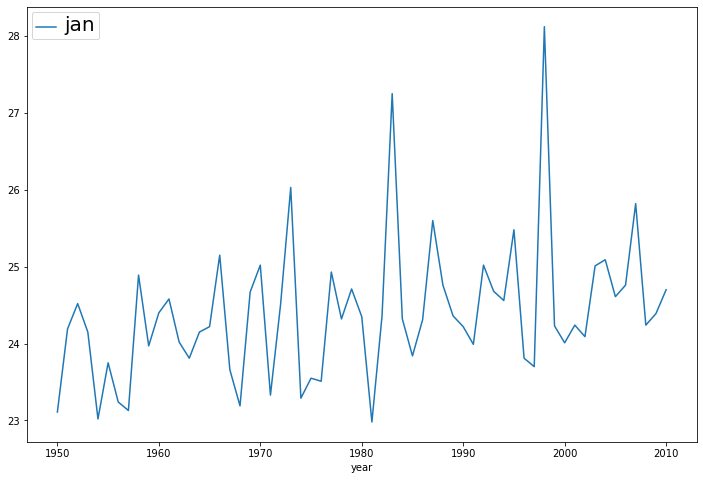

In [132]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
df_elnino_ts.jan.plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);


## Decomposition of Time series into seasonal and trend 

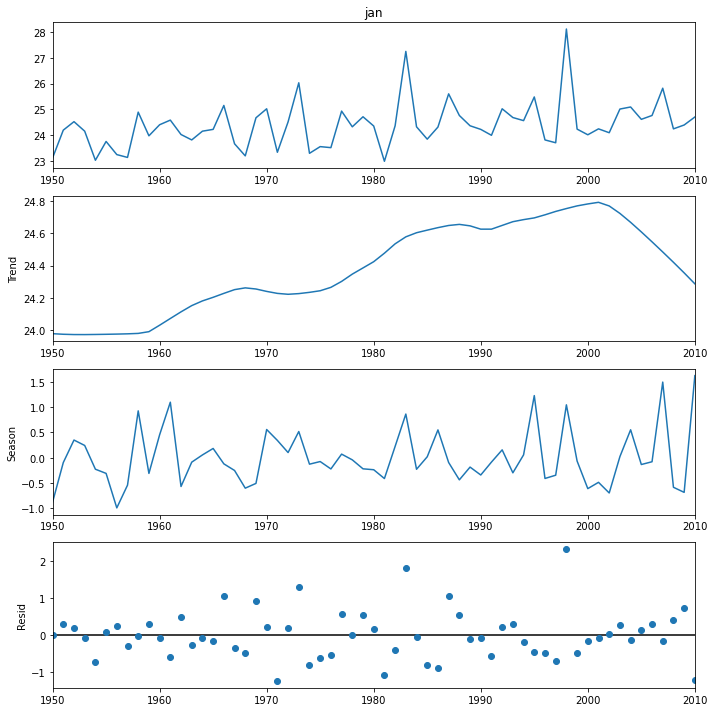

In [217]:
from statsmodels.tsa.seasonal import STL
stl = STL(pd.Series(df_elnino_ts.jan), period = 12)
res = stl.fit()
fig = res.plot()

If we only focus on the surface temperature of January throughout the years we can observe that the trend  in temperature increases but after the year 2000, the temperature of the water decreases. For the seasonality graph there seems to be a trend in which it increases for a certain amount of years then it decreases. The residual graph shows that the residual stays around the 0 which means that the predicted values are close to the actual values, there are some outliers but overall the graph tends to stay around 0.

### Extra

### Plotting ACF and PACF

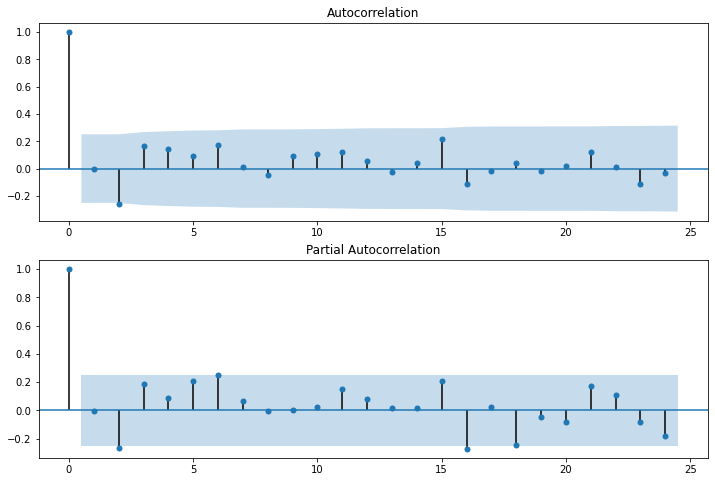

In [218]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA


fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_elnino_ts.jan.squeeze(), lags=24, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_elnino_ts, lags=24, ax=ax2)

## Figuring whether Multiplicative model or aditive model is more useful

Text(0.5, 0.98, 'Multiplicative Decompose')

Text(0.5, 0.98, 'Additive Decompose')

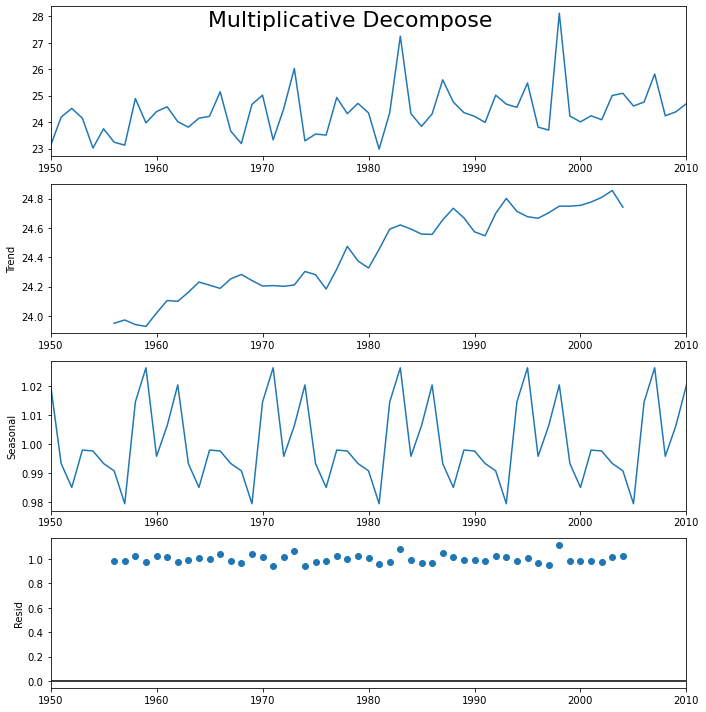

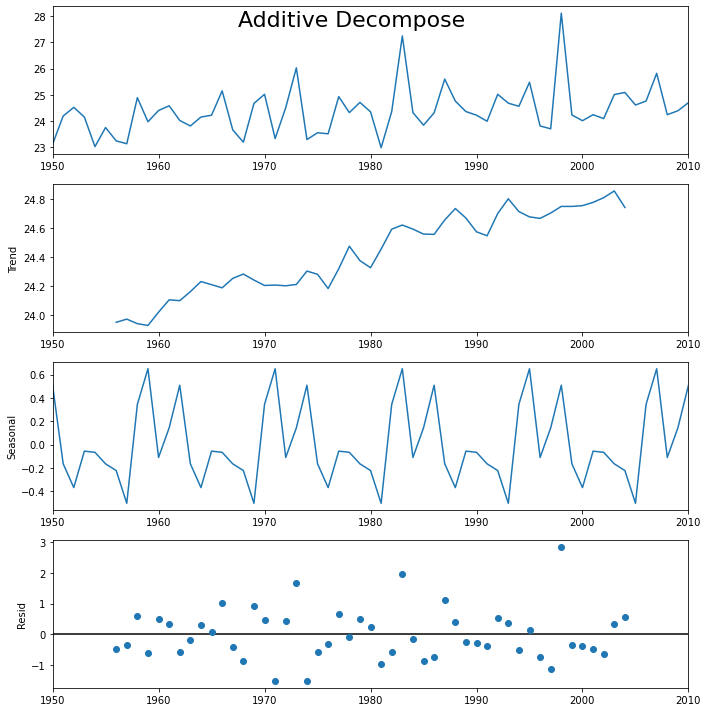

In [219]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_elnino_ts, model='multiplicative', period=12)

# Additive Decomposition
result_add = seasonal_decompose(df_elnino_ts, model='additive', period=12)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

## Fitting Models

In [225]:
arma_mod = ARIMA(df_elnino_ts, order=(1, 2, 0)).fit()
#print(arma_mod.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [226]:
arma_mod2 = ARIMA(df_elnino_ts, order=(1, 0, 0)).fit()
print(arma_mod2.params)

const     24.392170
ar.L1     -0.003117
sigma2     0.821583
dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<ipython-input-227-dff9baa0492f>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


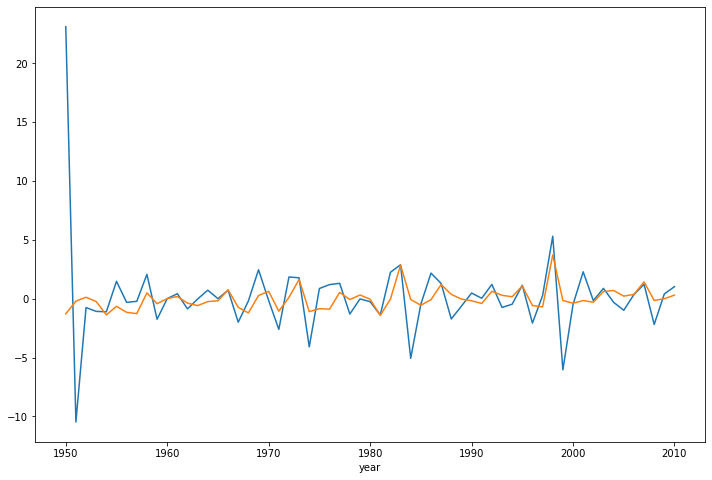

In [227]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod.resid.plot(ax=ax);
ax = fig.add_subplot(111)
ax = arma_mod2.resid.plot(ax=ax);